In [71]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt


In [72]:
# LBP AND HISTOGRAM FUNC DEFINITIONS

# input 2d grayscale numpy image
def lbp(im_np):
    im_lbp = im_np.copy()

    for i in range(1, im_np.shape[0] - 1):
        for j in range(1, im_np.shape[1] - 1):
            center = im_np[i, j]
            neighbour_patterns = []
            for l in range(-1, 2):
                for k in range(-1, 2):
                    if not (l == 0 and k == 0):
                        val = im_np[i+l, j+k]
                        neighbour_patterns.append(1 if val >= center else 0)
            texture = int(''.join(str(n) for n in neighbour_patterns), 2)
            im_lbp[i, j] = texture

    return im_lbp
            
def lbp_hist(im_lbp):
    hist = np.histogram(im_lbp.flatten())
    normalized_counts = hist[0] / hist[0].sum()
    return normalized_counts, hist[1]


Counts: [0.199225   0.08616667 0.02544167 0.00985    0.07435833 0.04814167
 0.01510833 0.02365833 0.08038333 0.43766667] Bins: [  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


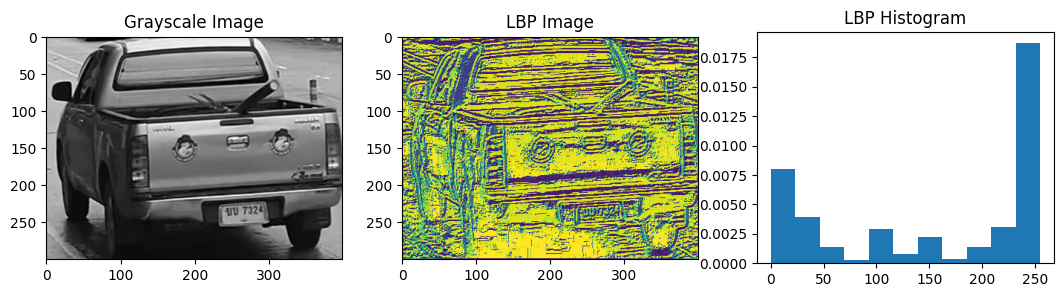

Counts: [0.11       0.05548333 0.02653333 0.011325   0.06611667 0.04520833
 0.01376667 0.02504167 0.05580833 0.59071667] Bins: [  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


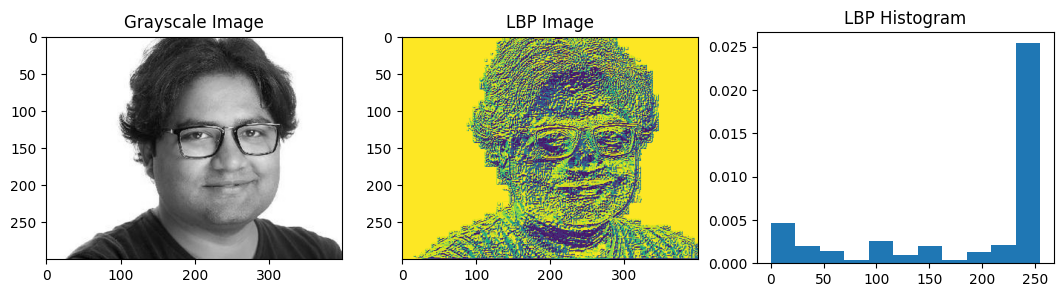

Counts: [0.293875   0.06684167 0.04120833 0.02094167 0.05271667 0.05201667
 0.01931667 0.04418333 0.06631667 0.34258333] Bins: [  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


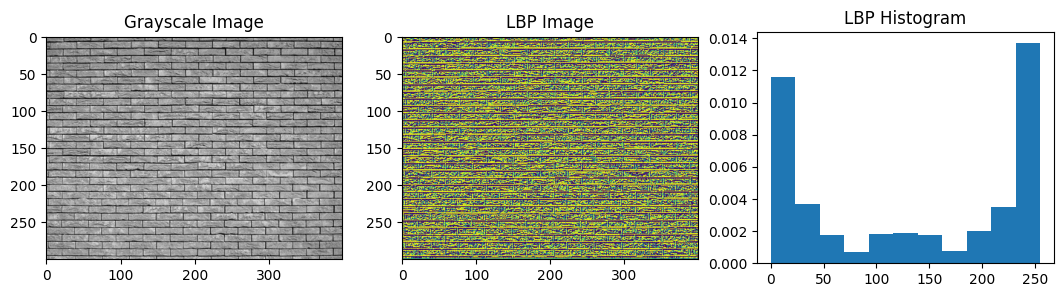

Counts: [0.188275   0.07258333 0.09001667 0.03713333 0.08625833 0.079275
 0.03939167 0.090575   0.08204167 0.23445   ] Bins: [  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


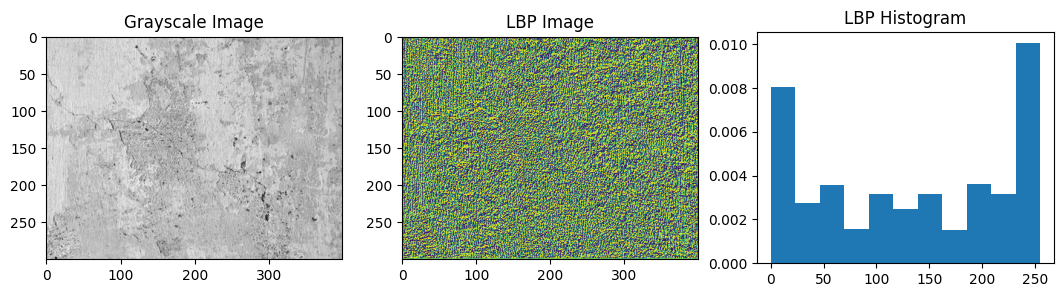

Counts: [0.140675   0.0699     0.14971667 0.0187     0.091725   0.06539167
 0.017925   0.11928333 0.10031667 0.22636667] Bins: [  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


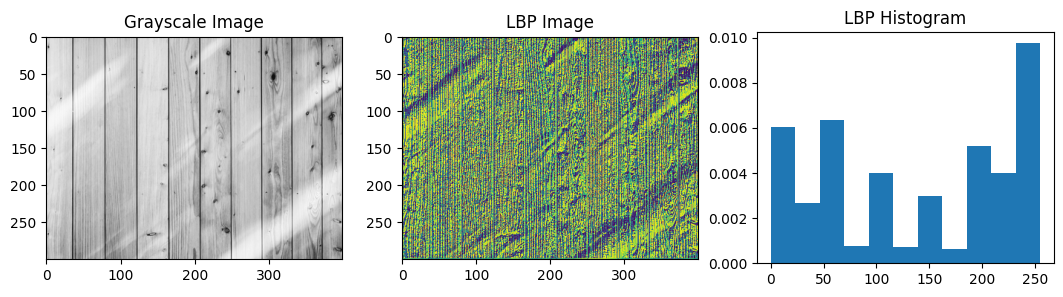

In [75]:
# APPLYING LBP ON IMAGES (NEW IMAGES TO DEMONSTRATE TEXTURE VARIANCE)

im_urls = ["../data/vehicle-type-detecion/pickup/PIC_0.jpg", "./additional_images/kshitijs.jpg",  "./additional_images/bricks.jpg",  "./additional_images/concrete.jpg", "./additional_images/wood.jpg"]

for im_url in im_urls:
    im = Image.open(im_url)

    im_gray = im.convert("L")
    im_resized = ImageOps.fit(im_gray, (400, 300), method=Image.Resampling.LANCZOS)
    im_np = np.array(im_resized)

    count, bins = lbp_hist(lbp(im_np))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
    ax1.imshow(im_np, cmap="gray")
    ax1.set_title("Grayscale Image")
    ax2.imshow(lbp(im_np))
    ax2.set_title("LBP Image")
    ax3.hist(lbp(im_np).flatten(), bins=len(bins), density=True)
    ax3.set_title("LBP Histogram")
    print('Counts:', count, 'Bins:', bins)
    plt.show()